# SIC data tables

In [1]:
include("Zauner.jl")


Welcome to 

    _    _           _
   | |  | |         | |
   | |__| | ___  ___| | _____
   |  __  |/ _ \/ __| |/ / _ \
   | |  | |  __/ (__|   <  __/
   |_|  |_|\___|\___|_|\_\___|
    
Version 0.16.10 ... 
 ... which comes with absolutely no warranty whatsoever
(c) 2015-2023 by Claus Fieker, Tommy Hofmann and Carlo Sircana



sic_class_number (generic function with 2 methods)

### Algebraic functions for SIC data tables

Now define some functions for working with SICs.
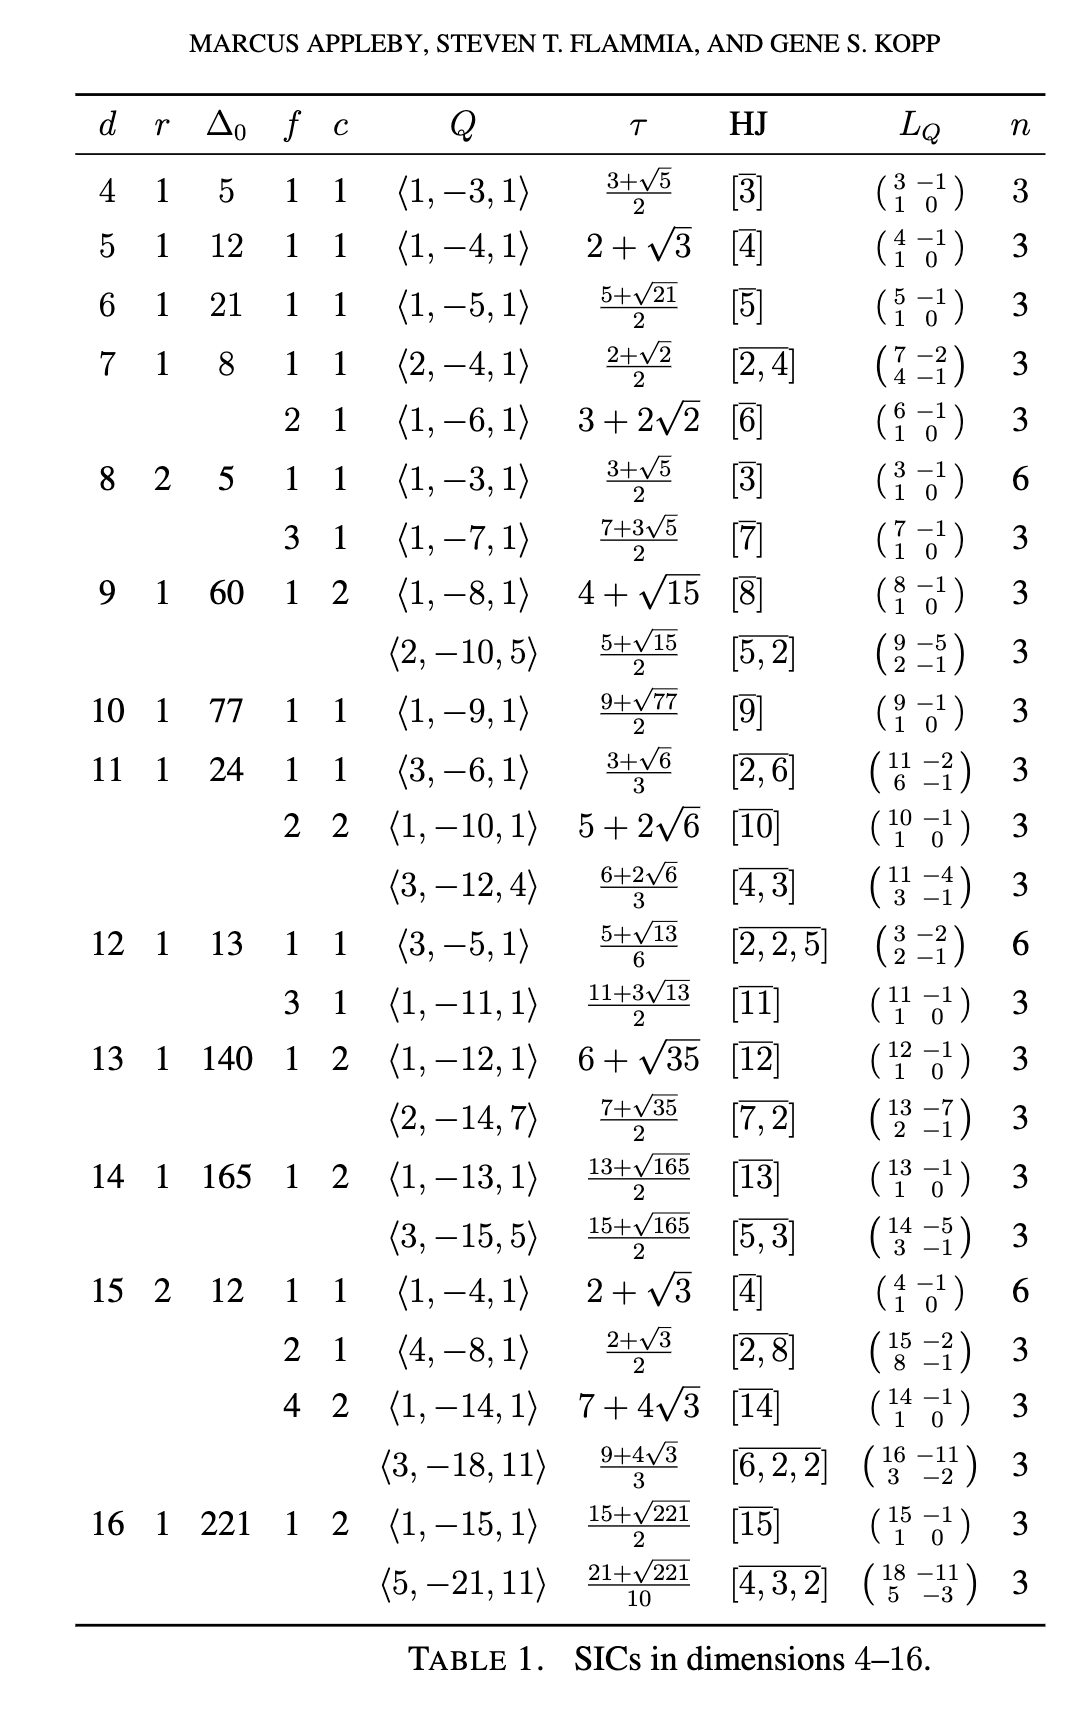


In [2]:
K, a = sic_base_field(5)

(Real quadratic field defined by x^2 - 12, sqrt(12))

In [3]:
Of = Order(4 * basis(K) .// [1; 2])

Order of Real quadratic field defined by x^2 - 12
with Z-basis NfOrdElem[1, 2*sqrt(12)]

In [4]:
class_group(Of)

(GrpAb: Z/1, ClassGroup map of 
Set of ideals of Of
)

In [17]:
Ug, f = unit_group(Of)
u = f.([Ug[1],Ug[2]])

2-element Vector{NfOrdElem}:
 -1
 -2*sqrt(12) + 7

In [21]:
norm(f(Ug[2]))

1

In [5]:
d = 5

Δ(d)
K, a = sic_base_field(d)
sic_class_number(K)

1

In [6]:
d=35
D = Δ(d)
f = sqrt(div((d+1)*(d-3),D)) # so that Δ*f^2 = (d+1)*(d-3), with Δ fundamental
f = sort(divisors(f))
ff = map(x -> x^2, f)
K, a = sic_base_field(d)
println("\nd = $d, a = $a")
j=6
bOK = [div(a,a); (ff[j]*D + f[j]*a)//2]
OKf = Order(bOK)
println("f = ",f[j])
println("c(OKf) = ",order(picard_group(OKf)[1]))


d = 35, a = sqrt(8)
f = 12
c(OKf) = 4


In [14]:
?picard_group

search: picard_group



```
picard_group(O::NfOrd) -> GrpAbFinGen, MapClassGrp
```

Returns the Picard group of $O$ and a map from the group in the set of (invertible) ideals of $O$.

---

```
picard_group(O::AlgAssAbsOrd, prepare_ref_disc_log::Bool = false)
  -> GrpAbFinGen, MapPicardGroup
```

Given an order $O$ in a commutative algebra over $\mathbb Q$, this function returns the picard group of $O$. If `prepare_ref_disc_log` is `true`, then (possibly expensive) preparations for the computation of refined discrete logarithms in non maximal orders are done.


In [15]:
pg, pgg = picard_group(OKf)

(GrpAb: Z/4, Picard Group map of 
Set of ideals of OKf
)

In [ ]:
pgg / ideal(OKf,1)

LoadError: MethodError: no method matching /(::Hecke.MapPicardGrp{GrpAbFinGen, Hecke.NfAbsOrdIdlSet{AnticNumberField, nf_elem}}, ::NfOrdIdl)

In [17]:
using 

In [21]:
# ltx = Base.REPL
#Completions.latex_symbols

for i in 1:3 
    println(L"a_%$i") 
end

$a_1$
$a_2$
$a_3$


In [33]:
dmax = 1000
sicmul = [[2; 1]]
for d in 4:dmax
    D = Δ(d)
    f = sqrt(div((d+1)*(d-3),D)) # so that Δ*f^2 = (d+1)*(d-3), with Δ fundamental
    f = sort(divisors(f))
    ff = map(x -> x^2, f)
    K, a = sic_base_field(d)
    for j = 1:length(ff)
        bOK = [div(a,a); (ff[j]*D + f[j]*a)//2]
        OKf = Order(bOK)
        push!(sicmul, [d; order(picard_group(OKf)[1])])
        # println("f = ",f[j])
        # println(picard_group(OKf)[2])
    end
end
sicmul=hcat(sicmul...)

2×2073 Matrix{Int64}:
 2  4  5  6  7  7  8  8  9  10  11  11  …  998  998  999  999  999  999  1000
 1  1  1  1  1  1  1  1  2   1   1   2      20   60    8   16   40   80    32

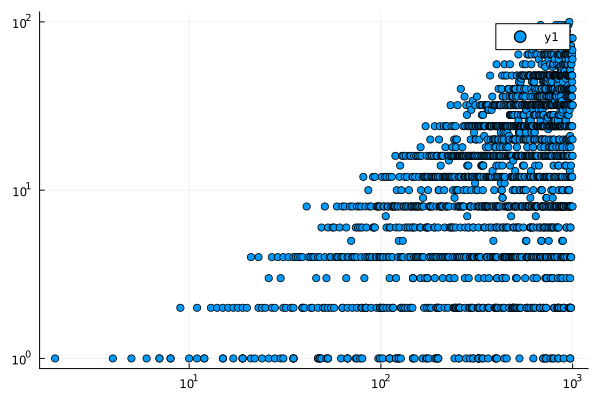

In [34]:
scatter(sicmul[1,:], sicmul[2,:], xaxis=:log, yaxis=:log)

In [16]:
dmax = 1000
sicnum = zeros(Int,dmax)
sicnum[1:3] .= 1
for d in 4:dmax
    D = Δ(d)
    f = sqrt(div((d+1)*(d-3),D)) # so that Δ*f^2 = (d+1)*(d-3), with Δ fundamental
    f = sort(divisors(f))
    ff = map(x -> x^2, f)
    K, a = sic_base_field(d)
    for j = 1:length(ff)
        bOK = [div(a,a); (ff[j]*D + f[j]*a)//2]
        OKf = Order(bOK)
        sicnum[d] += order(picard_group(OKf)[1])
        # println("f = ",f[j])
        # println(picard_group(OKf)[2])
    end
end
sicnum

1000-element Vector{Int64}:
   1
   1
   1
   1
   1
   1
   2
   2
   2
   1
   3
   2
   2
   ⋮
 120
  40
  84
  36
  80
  44
  84
  68
  32
  80
 144
  32

In [11]:
using Plots

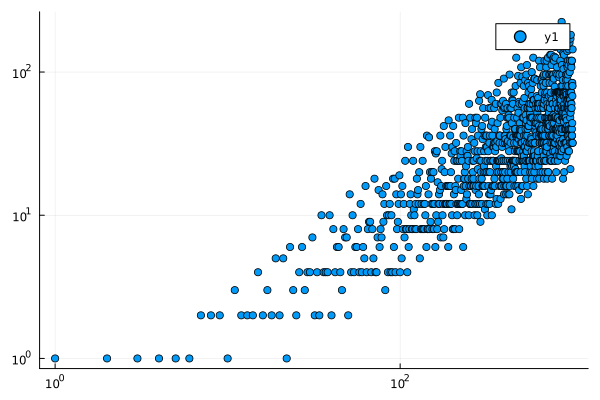

In [17]:
scatter(sicnum, xaxis=:log, yaxis=:log)

In [7]:
sicnum = [1,1,1]
for d in 4:45
    D = Δ(d)
    f = sqrt(div((d+1)*(d-3),D)) # so that Δ*f^2 = (d+1)*(d-3), with Δ fundamental
    f = sort(divisors(f))
    ff = map(x -> x^2, f)
    K, a = sic_base_field(d)
    println("\nd = $d, a = $a")
    for j = 1:length(ff)
        bOK = [div(a,a); (ff[j]*D + f[j]*a)//2]
        OKf = Order(bOK)
        # println("f = ",f[j])
        println("f = $(f[j]), c(OKf) = ",order(picard_group(OKf)[1]))
        # println(picard_group(OKf)[2])
    end
end


d = 4, a = sqrt(5)
f = 1, c(OKf) = 1

d = 5, a = sqrt(12)
f = 1, c(OKf) = 1

d = 6, a = sqrt(21)
f = 1, c(OKf) = 1

d = 7, a = sqrt(8)
f = 1, c(OKf) = 1
f = 2, c(OKf) = 1

d = 8, a = sqrt(5)
f = 1, c(OKf) = 1
f = 3, c(OKf) = 1

d = 9, a = sqrt(60)
f = 1, c(OKf) = 2

d = 10, a = sqrt(77)
f = 1, c(OKf) = 1

d = 11, a = sqrt(24)
f = 1, c(OKf) = 1
f = 2, c(OKf) = 2

d = 12, a = sqrt(13)
f = 1, c(OKf) = 1
f = 3, c(OKf) = 1

d = 13, a = sqrt(140)
f = 1, c(OKf) = 2

d = 14, a = sqrt(165)
f = 1, c(OKf) = 2

d = 15, a = sqrt(12)
f = 1, c(OKf) = 1
f = 2, c(OKf) = 1
f = 4, c(OKf) = 2

d = 16, a = sqrt(221)
f = 1, c(OKf) = 2

d = 17, a = sqrt(28)
f = 1, c(OKf) = 1
f = 3, c(OKf) = 2

d = 18, a = sqrt(285)
f = 1, c(OKf) = 2

d = 19, a = sqrt(5)
f = 1, c(OKf) = 1
f = 2, c(OKf) = 1
f = 4, c(OKf) = 1
f = 8, c(OKf) = 2

d = 20, a = sqrt(357)
f = 1, c(OKf) = 2

d = 21, a = sqrt(44)
f = 1, c(OKf) = 1
f = 3, c(OKf) = 4

d = 22, a = sqrt(437)
f = 1, c(OKf) = 1

d = 23, a = sqrt(120)
f = 1, c(OKf) = 2
f = 2

In [30]:
d = 48
K, a = quadratic_field((d+1)*(d-3))

(Real quadratic field defined by x^2 - 2205, sqrt(2205))

In [5]:
sic_class_number(K)

1

In [6]:
Δ(d)

12

In [7]:
HK, x = class_group(K)

(GrpAb: Z/1, ClassGroup map of 
Set of ideals of O_K
)

In [8]:
OK = maximal_order(K) 

Maximal order of Real quadratic field defined by x^2 - 12 
with basis nf_elem[1, 1//2*sqrt(12)]

In [11]:
?zeta_log_residue#(OK,1e-5)

search: zeta_log_residue



```
zeta_log_residue(O::NfOrd, error::Float64) -> arb
```

Computes the residue of the zeta function of $\mathcal O$ at $1$. The output will be an element of type `arb` with radius less then `error`.


In [4]:
H = hilbert_class_field(K)

Class field defined mod (<1, 1>, InfPlc{AnticNumberField, Hecke.NumFieldEmbNfAbs}[]) of structure Abelian group with structure: Z/1

In [10]:
?hilbert_class_field

search: hilbert_class_field hilbert_class_polynomial



```
hilbert_class_field(k::AnticNumberField) -> ClassField
```

The Hilbert class field of $k$ as a formal (ray-) class field.


In [20]:
typeof(K)

AnticNumberField

In [19]:
order(x)

2

In [107]:
keys(factor(2*3*3*5*7*13))

LoadError: MethodError: no method matching keys(::Fac{fmpz})
[0mClosest candidates are:
[0m  keys([91m::Base.SkipMissing[39m) at missing.jl:264
[0m  keys([91m::Tuple[39m) at tuple.jl:71
[0m  keys([91m::Tuple[39m, [91m::Tuple...[39m) at tuple.jl:76
[0m  ...

2-element Vector{Vector{Union{Int64, fmpz}}}:
 [2, 2]
 [3, 1]

In [12]:
?quadratic_space

search: quadratic_space quadratic_twist quadratic_twists



```
quadratic_space(K::NumField, n::Int; cached::Bool = true) -> QuadSpace
```

Create the quadratic space over `K` with dimension `n` and Gram matrix equals to the identity matrix.

---

```
quadratic_space(K::NumField, G::MatElem; cached::Bool = true) -> QuadSpace
```

Create the quadratic space over `K` with Gram matrix `G`. The matrix `G` must be square and symmetric.

---

```
quadratic_space(G::ZGenus) -> QuadSpace{FlintRationalField, fmpq_mat}
```

Return the quadratic space defined by this genus.


In [10]:
ray_class_field(K)

Class field defined mod (<12, 12>, InfPlc{AnticNumberField, Hecke.NumFieldEmbNfAbs}[Infinite place corresponding to (Embedding corresponding to ≈ 1.00)]) of structure Abelian group with structure: Z/2

In [11]:
narrow_class_group(K)

LoadError: MethodError: no method matching narrow_class_group(::AnticNumberField)
[0mClosest candidates are:
[0m  narrow_class_group([91m::NfOrd[39m) at ~/.julia/packages/Hecke/TlFaj/src/NumFieldOrd/NfOrd/RayClassGrp.jl:587

In [61]:
?ray_class_group

search: ray_class_group



```
ray_class_group(m::NfOrdIdl, inf_plc::Vector{InfPlc}; n_quo::Int, lp::Dict{NfOrdIdl, Int}) -> GrpAbFinGen, MapRayClassGrp
```

Given an ideal $m$ and a set of infinite places of $K$, this function returns the corresponding ray class group as an abstract group $\mathcal {Cl}_m$ and a map going from the group into the group of ideals of $K$ that are coprime to $m$. If `n_quo` is set, it will return the group modulo `n_quo`. The factorization of $m$ can be given with the keyword argument `lp`.


In [63]:
?maximal_order

search: maximal_order pmaximal_overorder finite_maximal_order



```
maximal_order(A::AbsAlgAss{ <: NumFieldElem }) -> AlgAssRelOrd
```

Returns a maximal $R$-order of $A$ where $R$ is the maximal order of the base ring of $A$.

---

```
maximal_order(O::AlgAssRelOrd) -> AlgAssRelOrd
```

Returns a maximal order of the algebra of $O$ containing itself.


In [40]:
# using BenchmarkTools, ProfileView

# Random density operator from the Hilbert-Schmidt ensemble with rank r.
# Returns a Haar random pure state density operator for r=1, or by default.
function randstate(n::Int,r=1::Int)
    A = randn(ComplexF64, n, r)
    ρ = A*A'
    return ρ ./ tr(ρ)
end

# The entropy in nats
function entropy(p::AbstractVector,tol=1e-15::Float64)
    deleteat!(p, abs.(p) .< tol)
    return abs(p'*log.(p))
end
entropy(ρ::AbstractMatrix,tol=1e-15::Float64) = entropy(eigvals(ρ), tol)

# mutual information in nats
function mutualinfo(ρ::AbstractMatrix,dA::Int,dB::Int)
    sA = dB .* (0:dA-1)
    sB = 1:dB
    ρA = sum([ ρ[jB .+ sA, jB .+ sA] for jB ∈ sB ])
    ρB = sum([ ρ[jA .+ sB, jA .+ sB] for jA ∈ sA ])
    return abs(entropy(ρA) + entropy(ρB) - entropy(ρ))
end
# not the most memory efficient, but it works.
mutualinfo(p::AbstractVector,dA::Int,dB::Int) = mutualinfo(diagm(p),dA,dB)

# project a vector onto the nearest Euclidean point in the simplex
function simplex_projection(p::AbstractVector)
    m = sort(p, rev = true)
    c = (cumsum(m) .- one(eltype(m))) # replace with 1 -> t to normalize to t.
    r = findlast((1:length(p)) .* m .> c)
    return max.(p .- c[r]/r, zero(p))
end

# Project the spectrum of a hermitian matrix onto the simplex.
function simplex_projection(ρ::AbstractMatrix)
    λ, U = eigen(ρ)
    p = simplex_projection(λ)
    return U*diagm(p)*U'
end

# construct the product Pauli POVM
X  = Matrix{ComplexF64}([0   1;  1  0])
Y  = Matrix{ComplexF64}([0 -im; im  0])
Z  = Matrix{ComplexF64}([1   0;  0 -1])

M0  = [ I+ Z, I- Z, I+ X, I- X, I+ Y, I- Y]./6
Mi0 = [ I+3Z, I-3Z, I+3X, I-3X, I+3Y, I-3Y]./2

@memoize M( n::Int) = (n == 1 ? M0  : [kron(a,b) for a in M( n-1), b in M0  ][:])
@memoize Mi(n::Int) = (n == 1 ? Mi0 : [kron(a,b) for a in Mi(n-1), b in Mi0 ][:])

# state estimation from S samples of the product Pauli POVM on ρ
function stateestimate(ρ::AbstractMatrix,S::Int)
    n = Int(log2(size(ρ)[1]))
    p = [real(tr(ρ*a)) for a in M(n)]
    q = rand(Multinomial(S, p))./S
    σ = sum(q .* Mi(n))
    return simplex_projection(σ)
end

function stateestimate(p::AbstractVector,n::Int,S::Int)
    q = rand(Multinomial(S, p))./S
    σ = sum(q .* Mi(n))
    return simplex_projection(σ)
end
stateestimate(p::AbstractVector,S::Int) = stateestimate(p,Int(log(length(p))/log(6)),S)


# Estimate the diagonal of the state
# function stateestimateZ(ρ::AbstractMatrix,S::Int)
#     p = real(diag(ρ))
#     n = Int(log2(length(ρ)))
#     q = rand(Multinomial(S, p))./S
#     return simplex_projection(q)
# end


# ρA ⊗ ρB
function AB(ρ::AbstractMatrix,dA::Int,dB::Int)
    sA = dB .* (0:dA-1)
    sB = 1:dB
    ρA = sum([ ρ[jB .+ sA, jB .+ sA] for jB ∈ sB ])
    ρB = sum([ ρ[jA .+ sB, jA .+ sB] for jA ∈ sA ])
    return kron(ρA,ρB)
end

# diagonalize the marginals
function marginal_diag(ρ::AbstractMatrix,dA::Int,dB::Int)
    sA = dB .* (0:dA-1)
    sB = 1:dB
    ρA = sum([ ρ[jB .+ sA, jB .+ sA] for jB ∈ sB ])
    ρB = sum([ ρ[jA .+ sB, jA .+ sB] for jA ∈ sA ])
    U = kron(eigvecs(ρA), eigvecs(ρB))
    return U'*ρ*U
end



# log diff
# logdiff(ρ::AbstractMatrix,dA::Int,dB::Int) = log(ρ) .- log(AB(ρ,dA,dB))

# KL divergence / quantum relative entropy
KL(ρ::AbstractMatrix,σ::AbstractMatrix) = real(tr(ρ*(log(ρ).-log(σ))))

# fidelity (||√ρ √σ||_1)^2
fidelity(ρ::AbstractMatrix,σ::AbstractMatrix) = sum(svdvals(sqrt(σ)*sqrt(ρ)))^2

fidelity (generic function with 1 method)

Let's test the Pauli product POVM. First we will test on "big $\epsilon$" instances (the "completeness" case of the testing), then on $\epsilon = 0$ instances (the "soundness" case). To generate instances with $\epsilon$ mutual information, we start with a product state and sample from it $T$ times. As T increases, this gets closer and closer to being a product state. 

In [120]:
MP = [1 1 1 1 1 1; 3 -3 0 0 0 0; 0 0 3 -3 0 0; 0 0 0 0 3 -3]

4×6 Matrix{Int64}:
 1   1  1   1  1   1
 3  -3  0   0  0   0
 0   0  3  -3  0   0
 0   0  0   0  3  -3

In [124]:
svdvals(MP)/sqrt(6)

4-element Vector{Float64}:
 1.7320508075688776
 1.7320508075688776
 1.7320508075688772
 1.0

In [211]:
pp = map(x->maximum([0,x]),kron(MP,MP))*p
pm = -map(x->minimum([0,x]),kron(MP,MP))*p

16-element Vector{Float64}:
 0.0
 0.5463600165521703
 0.43362025732279647
 0.3701786909263038
 0.504679658645722
 0.5577479729288886
 0.6689811547690092
 0.49667798954477993
 0.5184109864694079
 0.5616165758867115
 0.41028748980879204
 0.5498718562793621
 0.5433749366353421
 0.4037828753688787
 0.7422537630053376
 0.29866059736899936

In [225]:
K = 10^14
bq = vcat(rand(Poisson(K))/K, rand.(Skellam.(K*pp[2:end],K*pm[2:end]))/K)

16-element Vector{Float64}:
  0.99999999677584
 -0.09271999796985
  0.13275939130426
  0.25964254302224
 -0.00935933516439
 -0.11549603338372
 -0.33796222215341
  0.00664397680455
 -0.03682214045856
 -0.12323303064756
  0.17942504522526
 -0.09974386177159
 -0.08674968678057
  0.19243424746178
 -0.48450749215
  0.40267893878764

In [226]:
bq-bp

16-element Vector{Float64}:
 -3.224160272097265e-9
  3.51344906224238e-8
 -9.405014694818803e-8
 -7.512515237673156e-8
 -1.7872945861155398e-8
 -8.752594268801595e-8
  8.738460866020148e-8
 -4.410588997413173e-8
 -1.6751974420137206e-7
  1.2112586308954398e-7
  2.4842844115191554e-8
 -1.4921286570213077e-7
  1.8649011448990116e-7
 -1.8004625845779998e-9
  3.386067531918613e-8
  1.335256388235173e-7

In [134]:
kron([ MP for _ in 1:n]...)

16×36 Matrix{Int64}:
 1   1  1   1  1   1   1   1   1   1  …   1  1   1   1   1   1   1   1   1
 3  -3  0   0  0   0   3  -3   0   0      0  0   0   3  -3   0   0   0   0
 0   0  3  -3  0   0   0   0   3  -3     -3  0   0   0   0   3  -3   0   0
 0   0  0   0  3  -3   0   0   0   0      0  3  -3   0   0   0   0   3  -3
 3   3  3   3  3   3  -3  -3  -3  -3      0  0   0   0   0   0   0   0   0
 9  -9  0   0  0   0  -9   9   0   0  …   0  0   0   0   0   0   0   0   0
 0   0  9  -9  0   0   0   0  -9   9      0  0   0   0   0   0   0   0   0
 0   0  0   0  9  -9   0   0   0   0      0  0   0   0   0   0   0   0   0
 0   0  0   0  0   0   0   0   0   0      0  0   0   0   0   0   0   0   0
 0   0  0   0  0   0   0   0   0   0      0  0   0   0   0   0   0   0   0
 0   0  0   0  0   0   0   0   0   0  …   0  0   0   0   0   0   0   0   0
 0   0  0   0  0   0   0   0   0   0      0  0   0   0   0   0   0   0   0
 0   0  0   0  0   0   0   0   0   0      3  3   3  -3  -3  -3  -3  -3  -3
 0  

In [176]:
n = 2
d = 2^n
K = 100000
ρ = randstate(d,d)
p = [real(tr(ρ*a)) for a in M(n)]
bp = kron([ MP for _ in 1:n]...)*p
q = rand(Multinomial(K,p))/K
bq = kron([ MP for _ in 1:n]...)*q
map(x -> [sum(abs,x)/2, norm(x), maximum(abs.(x))],[p-q,bp-bq])

2-element Vector{Vector{Float64}}:
 [0.008264626708542857, 0.0036749125909799154, 0.001480723899591474]
 [0.049718922661952686, 0.031144765601117723, 0.01553502038241586]

In [180]:
kron([ MP for _ in 1:n]...)*rand(Multinomial(K,p))/K

16-element Vector{Float64}:
  1.0
 -0.09777
  0.1293
  0.25509
 -0.02424
 -0.11628
 -0.34587
  0.00603
 -0.03471
 -0.12519
  0.17973
 -0.10251
 -0.08001
  0.19152
 -0.47466
  0.40293

In [188]:
p

36-element Vector{Float64}:
 0.021734019548512163
 0.033301573935296494
 0.02181771829235956
 0.0332178751914491
 0.034914647826844114
 0.02012094565696454
 0.02867042305680224
 0.0274050945705002
 0.04111336422732971
 0.014962153399972731
 0.03506549762578878
 0.021010020001513655
 0.020756245616206124
 ⋮
 0.028137898413533816
 0.02259821973809482
 0.015597280168695753
 0.03513883798293289
 0.04376587639274192
 0.006970241758886719
 0.022266544191780587
 0.03810844876770188
 0.04733380235099352
 0.013041190608488944
 0.026214269059890986
 0.034160723899591475

In [186]:
kron([ MP for _ in 1:n]...)*rand.(Poisson.(K*p))/K

16-element Vector{Float64}:
  0.99784
 -0.10059
  0.14052
  0.25221
 -0.00768
 -0.10566
 -0.33876
 -0.01422
 -0.04614
 -0.13086
  0.18351
 -0.11133
 -0.09102
  0.20619
 -0.47601
  0.38196

In [179]:
sum(bp.*PPP)/d - sum(p.*Mi(n))

4×4 Matrix{ComplexF64}:
  5.55112e-17+0.0im          …           0.0+0.0im
 -1.38778e-17-1.38778e-17im     -1.38778e-17-1.38778e-17im
 -6.93889e-18-1.38778e-17im       3.1225e-17+1.38778e-17im
          0.0+0.0im              1.66533e-16+0.0im

In [174]:
PPP = [kron(a,b) for a in [I+0Z,Z,X,Y], b in [I+0Z,Z,X,Y] ][:]

16-element Vector{Matrix{ComplexF64}}:
 [1.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im; 0.0 + 0.0im 1.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im; 0.0 + 0.0im 0.0 + 0.0im 1.0 + 0.0im 0.0 + 0.0im; 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im 1.0 + 0.0im]
 [1.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im; 0.0 + 0.0im 1.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im; 0.0 + 0.0im 0.0 + 0.0im -1.0 + 0.0im -0.0 + 0.0im; 0.0 + 0.0im 0.0 + 0.0im -0.0 + 0.0im -1.0 + 0.0im]
 [0.0 + 0.0im 0.0 + 0.0im 1.0 + 0.0im 0.0 + 0.0im; 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im 1.0 + 0.0im; 1.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im; 0.0 + 0.0im 1.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im]
 [0.0 + 0.0im 0.0 + 0.0im 0.0 - 1.0im 0.0 + 0.0im; 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im 0.0 - 1.0im; 0.0 + 1.0im 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im; 0.0 + 0.0im 0.0 + 1.0im 0.0 + 0.0im 0.0 + 0.0im]
 [1.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im; 0.0 + 0.0im -1.0 + 0.0im 0.0 + 0.0im -0.0 + 0.0im; 0.0 + 0.0im 0.0 + 0.0im 1.0 + 0.0im 0.0 + 0.0im; 0.0 + 0.0im -0

In [161]:
kron([I+0Z,Z,X,Y]

4-element Vector{Matrix{ComplexF64}}:
 [1.0 + 0.0im 0.0 + 0.0im; 0.0 + 0.0im 1.0 + 0.0im]
 [1.0 + 0.0im 0.0 + 0.0im; 0.0 + 0.0im -1.0 + 0.0im]
 [0.0 + 0.0im 1.0 + 0.0im; 1.0 + 0.0im 0.0 + 0.0im]
 [0.0 + 0.0im 0.0 - 1.0im; 0.0 + 1.0im 0.0 + 0.0im]

----------------------------------------------------------------
                  Zero Mutual Information Test                  
----------------------------------------------------------------
Generate near-product ρ by resampling a product state T times.
Do Monte Carlo of 100 samples each for T = 10^(2:10).

    dA = 2
    dB = 2

Eigenvalue smoothing factor is 0.0/(S+d).
----------------------------------------------------------------
                         Soundness test                         
----------------------------------------------------------------
If I(ρ) is large, we should reject.

I(ρ) ≥ ϵ  =>  I(σ) ≥ C I(ρ) ≥ C ϵ, with probability ≥ 1-δ.
Using C = 0.5 and δ = 0.05.
Mean number of correct tests is: 0.98778

0.05–0.95 values of -log10(ϵ) are: 0.66463, 8.2005
----------------------------------------------------------------
                       Completeness test                        
----------------------------------------------------------------
If I(ρ) is zero

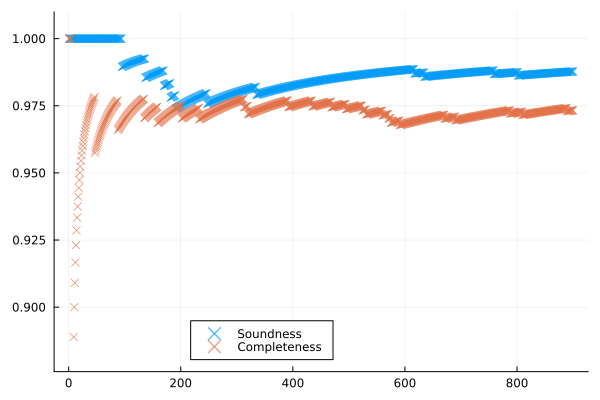

In [15]:
dA = 2
dB = 2
d = dA*dB
n = Int(log2(d))
cval = 0.5
δ = 0.05
a = 0.0 # Set smoothing by a factor of a/(S+d).

# Number of samples to use in empirical estimates 
S(ϵ,d,δ=0.05::Float64)::Int = round(Int,4log(1/δ)*d^2*log(1/ϵ)/ϵ)

# Given sample access to the state ρ, sample S times and test if empirical I(σ) > ϵ.
# Returns 'true' or '1' if I(ρ) < ϵ and '0' otherwise. 
function Zero_MI_Test(ρ::AbstractMatrix,ϵ::Float64,dA::Int,dB::Int,S::Int,a=0.0::Float64)
    d = dA*dB
    n = Int(log2(d))
    p = [real(tr(ρ*a)) for a in M(n)]
    q = rand(Multinomial(S, p))./S
    σ = sum(q .* Mi(n))
    σ = (1-a)*σ + a*I/d # optionally smooth the small eigenvalues
    return mutualinfo(simplex_projection(σ),dA,dB) < ϵ
end


println("----------------------------------------------------------------")
println("                  Zero Mutual Information Test                  ")
println("----------------------------------------------------------------")

t = 100
kmin = 2
kmax = 10
Δk = kmax-kmin+1
L = Δk*t # length of data
dataS = BitVector(undef, L)
dataC = BitVector(undef, L)
epsrange = Vector{Float64}(undef, L)

println("Generate near-product ρ by resampling a product state T times.")
println("Do Monte Carlo of $t samples each for T = 10^($kmin:$kmax).")
println("")
println("    dA = $dA")
println("    dB = $dB")
println("")
println("Eigenvalue smoothing factor is $a/(S+d).")


println("----------------------------------------------------------------")
println("                         Soundness test                         ")
println("----------------------------------------------------------------")
println("If I(ρ) is large, we should reject.\n")
println("I(ρ) ≥ ϵ  =>  I(σ) ≥ C I(ρ) ≥ C ϵ, with probability ≥ 1-δ.")
println("Using C = $cval and δ = $δ.")

t1 = now()

m = 0
for k=1:Δk
    T = d^2*10^k
    for j=1:t
        ρ = kron(randstate(dA,dA),randstate(dB,dB))
        ρ = stateestimate(ρ,T) # a state that is "T-close" to product.
        ϵ = mutualinfo(ρ,dA,dB)
        m += 1
        dataS[m] = 1-Zero_MI_Test(ρ,0.5*ϵ,dA,dB,S(ϵ,d,δ),a/(S(ϵ,d,δ)+d))
        epsrange[m] = log(1/ϵ)/log(10)
    end
end

println("Mean number of correct tests is: ",round(mean(dataS);sigdigits=5),"\n")
er = sort(epsrange)
e1 = round( er[round(Int, 0.05*L)] ; sigdigits=5)
e2 = round( er[round(Int, 0.95*L)] ; sigdigits=5)
println("0.05–0.95 values of -log10(ϵ) are: ",e1,", ",e2)


println("----------------------------------------------------------------")
println("                       Completeness test                        ")
println("----------------------------------------------------------------")
println("If I(ρ) is zero, we should accept.\n")
println("I(ρ) == 0  => I(σ) ≤ ϵ, with probability ≥ 1-δ.\n")
println("Using δ = $δ.")

m = 0
for k=kmin:kmax
    ϵ = 10.0^(-k)
    for j=1:t
        ρ = kron(randstate(dA,dA),randstate(dB,dB))
        m += 1
        dataC[m] = Zero_MI_Test(ρ,ϵ,dA,dB,S(ϵ,d,δ),a/(S(ϵ,d,δ)+d))
    end
end

t2 =now()

println("Mean number of correct tests is: ",round(mean(dataC);sigdigits=5),"\n")

println("Total time elapsed: ",canonicalize(t2 - t1))

scatterplotS = scatter(
    cumsum(dataS)./(1:L);
        label="Soundness",
        markershape = :x,
        markeralpha = 0.7,)
scatterplotC = scatter!(
    cumsum(dataC)./(1:L);
        label="Completeness",
        markershape = :x,
        markeralpha = 0.7,
        ylim=[0.9*mean(dataC),1.01],
        legend=:bottom,)
# s1 = scatter(cumsum(data))
# plot!(x->x,0,L)
# plot!(s1; ratio=:equal, xlim=[0.0,L], ylim=[0.0,L])

## Using the local eigenbasis

What if we adapt to the local eigenbasis of the marginals?

----------------------------------------------------------------
                  Zero Mutual Information Test                  
----------------------------------------------------------------
Generate near-product ρ by resampling a product state T times.
Do Monte Carlo of 100 samples each for T = 10^(2:10).

    dA = 4
    dB = 4

Eigenvalue smoothing factor is 0.0/(S+d).
----------------------------------------------------------------
                         Soundness test                         
----------------------------------------------------------------
If I(ρ) is large, we should reject.

I(ρ) ≥ ϵ  =>  I(σ) ≥ C I(ρ) ≥ C ϵ, with probability ≥ 1-δ.
Using C = 0.5 and δ = 0.05.
Mean number of correct tests is: 1.0

0.05–0.95 values of -log10(ϵ) are: 0.17329, 6.8256
----------------------------------------------------------------
                       Completeness test                        
----------------------------------------------------------------
If I(ρ) is zero, we

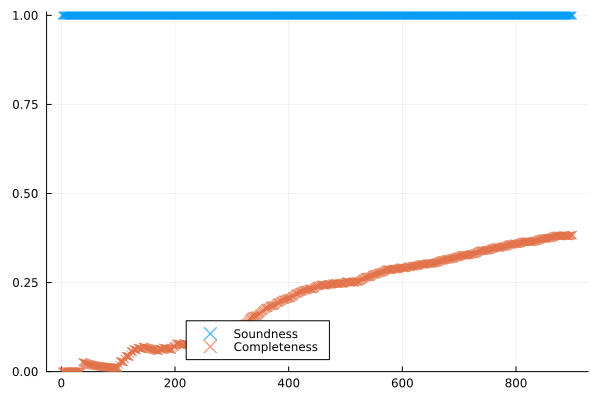

In [118]:
dA = 4
dB = 4
d = dA*dB
n = Int(log2(d))
cval = 0.5
δ = 0.05
a = 0.0 # Set smoothing by a factor of a/(S+d).

# Number of samples to use in empirical estimates 
S(ϵ,d,δ=0.05::Float64)::Int = round(Int,4log(1/δ)*d^2*log(1/ϵ)/ϵ)

# Given sample access to the state ρ, sample S times and test if empirical I(σ) > ϵ.
# Returns 'true' or '1' if I(ρ) < ϵ and '0' otherwise. 
function Zero_MI_Test(ρ::AbstractMatrix,ϵ::Float64,dA::Int,dB::Int,S::Int,a=0.0::Float64)
    d = dA*dB
    n = Int(log2(d))
    p = [real(tr(ρ*a)) for a in M(n)]
    q = rand(Multinomial(S, p))./S
    σ = sum(q .* Mi(n))
    σ = (1-a)*σ + a*I/d # optionally smooth the small eigenvalues
    return mutualinfo(simplex_projection(σ),dA,dB) < ϵ
end


println("----------------------------------------------------------------")
println("                  Zero Mutual Information Test                  ")
println("----------------------------------------------------------------")

t = 100
kmin = 2
kmax = 10
Δk = kmax-kmin+1
L = Δk*t # length of data
dataS = BitVector(undef, L)
dataC = BitVector(undef, L)
epsrange = Vector{Float64}(undef, L)

println("Generate near-product ρ by resampling a product state T times.")
println("Do Monte Carlo of $t samples each for T = 10^($kmin:$kmax).")
println("")
println("    dA = $dA")
println("    dB = $dB")
println("")
println("Eigenvalue smoothing factor is $a/(S+d).")


println("----------------------------------------------------------------")
println("                         Soundness test                         ")
println("----------------------------------------------------------------")
println("If I(ρ) is large, we should reject.\n")
println("I(ρ) ≥ ϵ  =>  I(σ) ≥ C I(ρ) ≥ C ϵ, with probability ≥ 1-δ.")
println("Using C = $cval and δ = $δ.")

t1 = now()

m = 0
for k=1:Δk
    T = d^2*10^k
    for j=1:t
        ρ = kron(randstate(dA,dA),randstate(dB,dB))
        ρ = stateestimate(ρ,T) # a state that is "T-close" to product.
        ϵ = mutualinfo(ρ,dA,dB)
        m += 1
        dataS[m] = 1-Zero_MI_Test(ρ,cval*ϵ,dA,dB,S(ϵ,d,δ),a/(S(ϵ,d,δ)+d))
        epsrange[m] = log(1/ϵ)/log(10)
    end
end

println("Mean number of correct tests is: ",round(mean(dataS);sigdigits=5),"\n")
er = sort(epsrange)
e1 = round( er[round(Int, 0.05*L)] ; sigdigits=5)
e2 = round( er[round(Int, 0.95*L)] ; sigdigits=5)
println("0.05–0.95 values of -log10(ϵ) are: ",e1,", ",e2)


println("----------------------------------------------------------------")
println("                       Completeness test                        ")
println("----------------------------------------------------------------")
println("If I(ρ) is zero, we should accept.\n")
println("I(ρ) == 0  => I(σ) ≤ ϵ, with probability ≥ 1-δ.\n")
println("Using δ = $δ.")

m = 0
for k=kmin:kmax
    ϵ = 10.0^(-k)
    for j=1:t
        ρ = kron(randstate(dA,dA),randstate(dB,dB))
        m += 1
        dataC[m] = Zero_MI_Test(ρ,ϵ,dA,dB,S(ϵ,d,δ),a/(S(ϵ,d,δ)+d))
    end
end

t2 =now()

println("Mean number of correct tests is: ",round(mean(dataC);sigdigits=5),"\n")

println("Total time elapsed: ",canonicalize(t2 - t1))

dS = cumsum(dataS)./(1:L)
dSy = mean(dS) - 2std(dS)
dC = cumsum(dataC)./(1:L)
dv = minimum([mean(dC) - 2std(dC),mean(dS) - 2std(dS)])
dy = maximum([0,dv])

scatterplotS = scatter(dS;
        label="Soundness",
        markershape = :x,
        markeralpha = 0.7,)

scatterplotC = scatter!(dC;
        label="Completeness",
        markershape = :x,
        markeralpha = 0.7,
        ylim=[dy,1.01],
        legend=:bottom,)
# s1 = scatter(cumsum(data))
# plot!(x->x,0,L)
# plot!(s1; ratio=:equal, xlim=[0.0,L], ylim=[0.0,L])

In [92]:
ρ = kron(randstate(dA,dA),randstate(dB,dB))
ρ = stateestimate(ρ,10000) # a state that is "T-close" to product.

4×4 Matrix{ComplexF64}:
 0.535975+0.0im          0.0813-0.132075im  …  0.019125+0.08415im
   0.0813+0.132075im   0.165175+0.0im           -0.0753+0.046575im
  -0.2787-0.191475im  -0.071325+0.02655im        0.0255-0.046575im
 0.019125-0.08415im     -0.0753-0.046575im     0.071575+0.0im

In [93]:
mutualinfo(ρ,dA,dB)

0.024681336355901418

In [94]:
tr(ρ'*ρ) - diag(ρ)'*diag(ρ)

0.32457561749999814 + 0.0im

In [97]:
norm((ρ-diagm(diag(ρ)))[:])/2

0.28485769144434125

In [48]:
U = eigvecs(AB((ρ+ρ')/2,dA,dB))
mutualinfo(U'*ρ*U,dA,dB)

0.10225568294070958

In [49]:
round.(marginal_diag((ρ+ρ')/2,dA,dB); digits=5)

4×4 Matrix{ComplexF64}:
  0.01244+0.0im      -0.00868-0.01811im  …   0.01667+0.0151im
 -0.00868+0.01811im   0.03333-0.0im         -0.01548+0.02695im
  0.01548+0.02695im   0.02923-0.04501im      0.00868+0.01811im
  0.01667-0.0151im   -0.01548-0.02695im      0.84857-0.0im

In [79]:
σ = marginal_diag(AB((ρ+ρ')/2,dA,dB),dA,dB)

for k in [real(tr(σ*a)) for a in M(2)]
    display(k)
end

0.0006005855040256387

0.012522180563599725

0.006561383033812684

0.00656138303381268

0.0065613830338126814

0.006561383033812682

0.0044846017442746

0.09350374329921114

0.04899417252174289

0.04899417252174286

0.04899417252174287

0.048994172521742874

0.0025425936241501206

0.053012961931405436

0.027777777777777783

0.027777777777777773

0.027777777777777776

0.027777777777777776

0.002542593624150118

0.053012961931405436

0.027777777777777783

0.027777777777777762

0.027777777777777773

0.027777777777777776

0.0025425936241501184

0.053012961931405436

0.027777777777777783

0.02777777777777777

0.027777777777777776

0.027777777777777776

0.00254259362415012

0.053012961931405436

0.027777777777777783

0.02777777777777777

0.027777777777777776

0.027777777777777776

In [86]:
norm((ρ - diagm(diag(ρ)))[:])^2

0.4529792712342226

In [45]:
round.(marginal_diag(AB((ρ+ρ')/2,dA,dB),dA,dB); digits=5)

4×4 Matrix{ComplexF64}:
 0.00541-0.0im      0.0+0.0im     0.0+0.0im     -0.0-0.0im
    -0.0-0.0im  0.04036+0.0im    -0.0-0.0im      0.0+0.0im
     0.0-0.0im     -0.0+0.0im  0.1127+0.0im      0.0-0.0im
    -0.0+0.0im      0.0-0.0im     0.0+0.0im  0.84153-0.0im

### Other ideas...

In [446]:
dA = 2
dB = 2
d = dA*dB
S = 10000

# ρ = randstate(d,d)
# ρ = kron(randstate(dA,dA),randstate(dB,dB))
ρ = U*diagm(σ)*U'
println("λ(ρ) = ",round.(eigvals((ρ+ρ')/2); digits = 5))
σ = stateestimate(ρ,S)
ΔI = mutualinfo(σ,dA,dB) - mutualinfo(ρ,dA,dB)
println("I(ρ) = ",round(mutualinfo(ρ,dA,dB); digits = 5))
println("I(σ) = ",round(mutualinfo(σ,dA,dB); digits = 5))
println("For naive estimate, \n  ΔI = ",round(ΔI; digits = 5))

λ, U = eigen(σ)
σ = stateestimateZ(U'*ρ*U,S)
ΔI = mutualinfo(U*diagm(σ)*U',dA,dB) - mutualinfo(ρ,dA,dB)
println("λ(σ) = ",round.(σ; digits = 5))
println("Final estimate is\n  ΔI = ",round(ΔI; digits = 5))

println("Now add a little depolarizing noise")
δ = 1/(S+d)
ΔI = mutualinfo(U*diagm((1-δ)*σ .+ δ/d)*U',dA,dB) - mutualinfo(ρ,dA,dB)
println("λ(σ) = ",round.(σ; digits = 5))
println("Final estimate is\n  ΔI = ",round(ΔI; digits = 5))
println("ϵ = 5 log(S)/S = ", round(5log(S)/S; digits = 5))

λ(ρ) = [0.0116, 0.0277, 0.1406, 0.8201]
I(ρ) = 0.01762
I(σ) = 0.01732
For naive estimate, 
  ΔI = -0.0003
λ(σ) = [0.0116, 0.0275, 0.1452, 0.8157]
Final estimate is
  ΔI = 0.00139
Now add a little depolarizing noise
λ(σ) = [0.0116, 0.0275, 0.1452, 0.8157]
Final estimate is
  ΔI = 0.00139
ϵ = 5 log(S)/S = 0.00461


In [453]:
σ = 0 * ρ
s = Matrix{ComplexF64}[]
for j=1:S
    ΨA = randstate(dA,1)
    ΨB = randstate(dB,1)
    RM = [kron(ΨA,ΨB),kron(I-ΨA,ΨB),kron(ΨA,I-ΨB),kron(I-ΨA,I-ΨB)]
    p = [real(tr(ρ*a)) for a in RM]
    k = rand(Categorical(p))
    push!(s,[kron(3ΨA-I,3ΨB-I),kron(2I-3ΨA,3ΨB-I),kron(3ΨA-I,2I-3ΨB),kron(2I-3ΨA,2I-3ΨB)][k])
    σ += s[end]
end
println("Tr. dist. = ",round(sum(svd(σ/S-ρ).S)/2; digits = 5))
σ = simplex_projection(σ/S)
println("Tr. dist. = ",round(sum(svd(σ-ρ).S)/2; digits = 5))

Tr. dist. = 0.03312
Tr. dist. = 0.03312


In [405]:
sum(svd(σ-ρ).S)/2

0.11428239762892568

In [464]:
t2 = 0.0
for j=1:S
    for k=j+1:S
        t2 += tr(s[j]*s[k])
    end
end
t2/(S*(S-1))

0.34236957827091735 + 1.3872556246345292e-20im

0.9961258578235215

In [480]:
2*t2/(S*(S-1)) - S*(tr(σ*σ) - 25/S)/(S-1)

1.816324868286756e-13 - 1.3742999552539718e-17im

In [35]:
dA = 4
dB = 4
S = 10000
for j = 1:10
    ρ = randstate(dA*dB,dA*dB)
    σ = stateestimate(ρ,S)
    ΔI = mutualinfo(σ,dA,dB) - mutualinfo(ρ,dA,dB)
    f1 = real(tr((σ.-ρ)*logdiff(ρ,dA,dB))) # logdiff = (log ρ – log ρA⊗ρB)
    f2 = KL(σ,ρ) - KL(AB(σ,dA,dB),AB(ρ,dA,dB))
    println("ans = ", ΔI ≈ (f1 + f2) )
end

# Δ = σ – ρ
# I(σ) – I(ρ) = tr(Δ (log ρ – log ρA⊗ρB)) + (-KL(σ||ρ) + KL(σA⊗σB||ρA⊗ρB))

# I(σ) – I(ρ) = tr(Δ (log σ – log σA⊗σB)) + (KL(ρ||σ) - KL(ρA⊗ρB||σA⊗σB))


# 1/2 (log σ – log σA⊗σB) =  (log √σ – log √σA⊗σB)

# || √σ – √σA⊗σB || ≤ √I(σ)


# println(" other way...")
# for j = 1:10
#     ρ = randstate(dA*dB,dA*dB)
#     σ = stateestimate(ρ,S)
#     ΔI = mutualinfo(σ,dA,dB) - mutualinfo(ρ,dA,dB)
#     f1 = real(tr((σ.-ρ)*logdiff(σ,dA,dB)))
#     f2a = -KL(ρ,σ)
#     f2b = -KL(AB(ρ,dA,dB),AB(σ,dA,dB))
#     f2 = f2a - f2b
#     println("KL - |ΔI - f1| = ", ΔI - f1 - f2)
# end

ans = true
ans = true
ans = true
ans = true
ans = true
ans = true
ans = true
ans = true
ans = true
ans = true


### Convex optimization approach

In [57]:
using Convex, SCS

The idea here is to reduce the product $\rho$ instances to a convex program. One difficulty is that the mutual information is only convex in the marginals. So we can relax to $I(\sigma) \le S(\sigma_A) + S(\sigma_B)$. Then it is (potentially) sufficient for us analyze the following convex program:
\begin{align}
    \max_\sigma  &\ S(\sigma_A) + S(\sigma_B) \\
    \text{s.t.} &\ \mathrm{tr}(\sigma) = 1\\
    &\ \sigma \ge 0 \\
    &\ S(\rho_A\otimes\rho_B\|\sigma) \le \epsilon\,.
\end{align}
If $v(\rho,\epsilon)$ is the value of that convex optimization, and $v = O(\epsilon)$ independent (or only weakly dependent) of the minimal eigenvalue of $\rho$, then we know that the very basic algorithm gives a one-sided test. 

In [140]:
dA = 2
dB = 2
n = 2
d = dA*dB


# ρ = randstate(d,d)
ρ = kron(randstate(dA,dA),randstate(dB,dB))

println("I(ρ) = ",round(mutualinfo(ρ,dA,dB); sigdigits=4))
println("λ(ρ) = ",round.(eigvals(ρ); sigdigits=4),"\n")

p0 = [real(tr(ρ*a)) for a in M(n)]
ϵ = 1e-2
δ = 0.05
S = round(Int,2*log(1/δ)*d^2*log(1/ϵ)/ϵ)
println("Sampling with \nS = ",round(S; sigdigits=4),"\nϵ = ",round(ϵ; sigdigits=4))
p = rand(Multinomial(S,p0))/S

σ = sum(p .* Mi(n))
σp = 
println("I(σ+) = ", round(mutualinfo(simplex_projection(σ),dA,dB); sigdigits = 4))
a = 1/(S+d)
σa = simplex_projection(a*σ+(1-a)I/d)
println("I(σa) = ", round(mutualinfo(σa,dA,dB); sigdigits = 4))

I(ρ) = 1.11e-16
λ(ρ) = [4.876e-5, 0.0001586, 0.2351, 0.7647]

Sampling with 
S = 44150.0
ϵ = 0.01
I(σ+) = 0.004018
I(σa) = 7.8e-11


In [131]:
opnorm(simplex_projection(σ) - σ)

5.244335580209364e-16

In [104]:
σ = HermitianSemidefinite(dA*dB)
σA = partialtrace(σ,2,[dA,dB])
σB = partialtrace(σ,1,[dA,dB])
q = [real(tr(σ*a)) for a in M(n)]
Δ = sum(square,p-q)
c1 = tr(σ) == 1
# c2 = σA == ρA
# c3 = σB == ρB
# c4 = -ϵ .≤ p - q .≤ ϵ
# c4 = 100*abs.(Δ) .≤ ϵ

# c2 = quantum_relative_entropy(ρ,σ) ≤ ϵ

# obj = quantum_entropy(σA)+quantum_entropy(σB)
# prob = maximize(obj,c1,c2)
# solve!(prob, SCS.Optimizer(eps = 1e-8, max_iters=10^4); silent_solver = true)
# result = evaluate(obj)
obj = Δ
prob = minimize(obj,c1)#,c4...)
solve!(prob, SCS.Optimizer(eps = 1e-7, max_iters=10^4); silent_solver = true)
println("I(σ) = ", round(mutualinfo(σ.value,dA,dB); sigdigits = 4))
# println("ΔI = ", round(mutualinfo(σ.value,dA,dB)-mutualinfo(ρ,dA,dB); sigdigits = 4))
println("Tr dist = ",round(sum(svdvals(ρ-σ.value))/2; sigdigits = 4))


# println("\nNow with entropy regularizer\n")
# μ = 1e-5
# obj = Δ - μ*quantum_entropy(σ)
# prob = minimize(obj,c1)#,c4...)
# solve!(prob, SCS.Optimizer(eps = 1e-7, max_iters=10^4); silent_solver = true)
# println("I(σ) = ",mutualinfo(σ.value,dA,dB))
# println("ΔI = ",mutualinfo(ρ,dA,dB)-mutualinfo(σ.value,dA,dB))
# println("Tr dist = ",sum(svdvals(ρ-σ.value))/2)

I(ρ) = 1.1102230246251565e-16
λ(ρ) = [0.01826, 0.0471, 0.2611, 0.6736]

Sampling with 
S = 1.104e8
ϵ = 1.0e-5
I(σ) = 1.939e-6
I(σ) = 1.941e-6
Tr dist = 0.0004758


In [68]:
mutualinfo(ρ,dA,dB)-mutualinfo(σ.value,dA,dB)

0.03453654748187751

In [99]:
sum(svdvals(ρ-σ0))/2

0.0009294066839943148

In [97]:
# q0 = [real(tr(σ.value*a)) for a in M(n)]
σ0 = sum(p .* Mi(n))

4×4 Matrix{ComplexF64}:
  0.372588+0.0im         0.192756-0.116126im    …  -0.132472+0.0679097im
  0.192756+0.116126im    0.206093+0.0im             -0.13563-0.00936032im
   -0.2458+0.016924im   -0.121853+0.0851589im       0.140186-0.0842595im
 -0.132472-0.0679097im   -0.13563+0.00936032im      0.150194+0.0im

In [54]:
X  = Matrix{ComplexF64}([0   1;  1  0])
Y  = Matrix{ComplexF64}([0 -im; im  0])
Z  = Matrix{ComplexF64}([1   0;  0 -1])

S = 100000

ρ = [0.4 0.1+im*0.2; 0.1-im*0.2 0.6]
σ = HermitianSemidefinite(2)
p = [real(tr(ρ*a)) for a in M(1)]
p = rand(Multinomial(S,p))/S
q = [real(tr(σ*a)) for a in M(1)]
Δ = sum(square,p-q)

c1 = tr(σ) == 1
obj = Δ
prob = minimize(obj,c1)#,c4...)
solve!(prob, SCS.Optimizer; silent_solver = true)
result = evaluate(obj)
σ.value

2×2 Matrix{ComplexF64}:
 0.400505+2.71852e-21im  0.098805+0.20133im
 0.098805-0.20133im      0.599495-2.77791e-21im

In [55]:
sum(svdvals(ρ-σ.value))/2

0.001857940309960866

In [4]:
using Convex, SCS, LinearAlgebra

n = 20
P = randn(n, n) + im * randn(n, n)
P = P * P'
Q = randn(n, n) + im * randn(n, n)
Q = Q * Q'
Z = ComplexVariable(n, n)
objective = 0.5 * real(tr(Z + Z'))
constraint = [P Z; Z' Q] ⪰ 0
problem = maximize(objective, constraint)
solve!(problem, SCS.Optimizer; silent_solver = true)
computed_fidelity = evaluate(objective)



4×4 Matrix{ComplexF64}:
  0.295988+0.0im        -0.175323+0.0974785im  …   0.054696+0.167711im
 -0.175323-0.0974785im   0.256077+0.0im           0.0430106-0.221045im
 0.0497142+0.255497im    -0.11359-0.134966im      -0.142254+0.0790922im
  0.054696-0.167711im   0.0430106+0.221045im       0.207776+0.0im

In [21]:
println(eigvals(ρ))
println(eigvals(logdiff(ρ,dA,dB)))
println(opnorm(logdiff(ρ,dA,dB)))
println(opnorm(logdiff(ρ,dA,dB))/sqrt(mutualinfo(ρ,dA,dB)))

[0.02074027491592298, 0.0791767201461991, 0.3474740586601045, 0.5526089462777733]
[-1.8636834720806794, -0.5477656313519099, 0.2232541423037356, 0.7053597895638407]
1.8636834720806799
4.302069694578046


In [6]:
ρ = kron(randstate(2,1),randstate(2,1))
n = Int(log2(size(ρ)[1]))
p = [real(tr(ρ*a)) for a in M(n)]

σ = stateestimate(p,100000)

4×4 Matrix{ComplexF64}:
   0.539419+2.77556e-17im  …   -0.0765958+0.0263275im
  0.0454719-0.0812631im       -0.00220483+0.0155763im
 -0.0954284-0.469276im          0.0350981+0.0640698im
 -0.0765958-0.0263275im         0.0139249+0.0im

Here are some candidate "worst case" product states that we can try. 

In [7]:
ψ  = [(I+Z)/2, (I+(X+Z)/sqrt(2))/2, (I+(X+Y+Z)/sqrt(3))/2]
ψ2 = [kron(a,b) for a in ψ, b in ψ][:];

In [28]:
ρ = randstate(4,1)
ρA, ρB = reduced_density_ops(ρ,2,2)
sA, sB = reduced_density_ops(sqrt(ρ),2,2)

(ComplexF64[0.6180140740486868 + 0.0im 0.0782515711819987 - 0.3537828728655599im; 0.0782515711819987 + 0.3537828728655599im 0.3819859470247371 + 0.0im], ComplexF64[0.3852238131397431 + 0.0im 0.11419820428385981 + 0.3449610849386633im; 0.11419820428385981 - 0.3449610849386633im 0.6147762079336808 + 0.0im])

In [30]:
norm(sqrt(kron(ρA,ρB)) - kron(sqrt(ρA),sqrt(ρB)))

9.85237416106124e-16

(ComplexF64[0.5600600416939304 + 0.0im -0.0998212124619669 + 0.4862391514220005im; -0.0998212124619669 - 0.4862391514220005im 0.4399400020721566 + 0.0im], ComplexF64[0.971854271598149 + 0.0im 0.08243516636326167 + 0.1433806063868552im; 0.08243516636326167 - 0.1433806063868552im 0.028145772167938073 + 0.0im])

In [33]:
dA = 2
dB = 2
n = 2
ρ = ψ2[1]
p = [real(tr(ρ*a)) for a in M(n)]

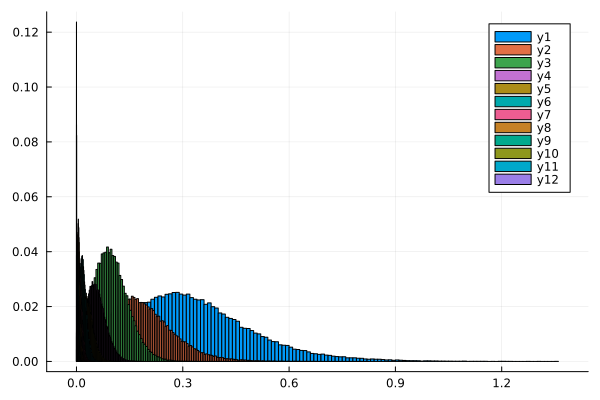

In [74]:
T = 10^5

hist = [mutualinfo(stateestimate(p,n,3^4),dA,dB) for a = 1:T];
plot = histogram(hist, normalize=:probability)

for s = 5:15
    hist = [mutualinfo(stateestimate(p,n,3^s),dA,dB) for a = 1:T];
    histogram!(hist, normalize=:probability)
end
plot

### Single-copy testing algorithm
Does the basic linear estimator, projected to the simplex, work as an algorithm for mutual information testing?

In [ ]:
dA = 2
dB = 2
n = 2
ρ = ψ2[1]
p = [real(tr(ρ*a)) for a in M(n)]

In [259]:
T = 10^4
δ = .05
xdata  = Float64[]
ydata  = Float64[]
λdata  = Float64[]
for k=1:20
    λmin = 0.0
    while λmin < 0.001 || λmin >= 0.003
        ρ = kron(randstate(2,2),randstate(2,2)) # ψ2[k]
        λmin = eigen(ρ).values[1]
    end
    p = [real(tr(ρ*a)) for a in M(n)]
    for s = 4:16
        stats = [mutualinfo(stateestimate(p,n,3^s),dA,dB) for a = 1:T]
        sort!(stats)
        y = stats[round(Int,(1-δ)*T)]
        push!(xdata,3.0^s)
        push!(ydata,y)
        push!(λdata,λmin)
    end
end

[10.794962238439863, 10.91245106008071, 10.95274510438831, 11.015050722815225, 11.198996168083971, 11.203982686896012, 11.254176286929052, 11.29556723275582, 11.395939032232388, 11.39827677252755, 11.490214327058393, 11.54469411517229, 11.578706646468039, 11.648331090636637, 11.710195197379182, 11.76156581217543, 11.87115707312678, 11.980567098318108, 12.037605750052602, 12.207723755084816]


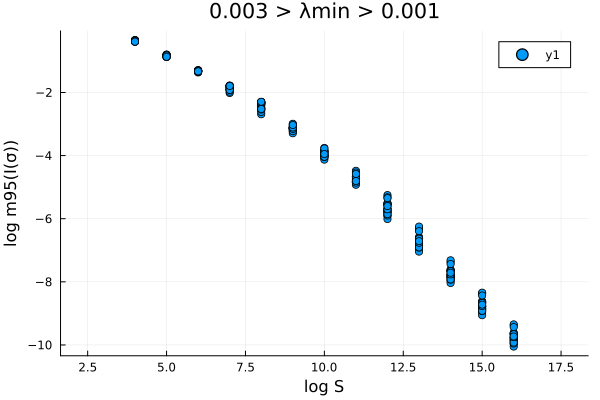

In [260]:
println(2sort(-log.(unique(λdata)))./log(3))
scatter(log.(xdata)./log(3),log.(ydata)./log(3),
    aspect_ratio=1,
    xaxis=("log S"),
    yaxis=("log m95(I(σ))"),
    title=("0.003 > λmin > 0.001"),
)

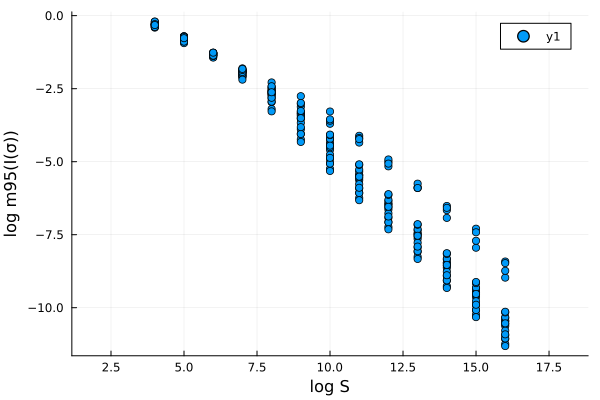

In [232]:
scatter(log.(xdata)./log(3),log.(ydata)./log(3),
    aspect_ratio=1,
    xaxis=("log S"), 
    yaxis=("log m95(I(σ))"),
)

In [215]:
2sort(-log.(unique(λdata)))./log(3)

20-element Vector{Float64}:
  5.879361537705544
  5.9555685219770655
  6.714358428660477
  7.121998788354881
  7.733201542684163
  7.881806887704611
  8.237307508409675
  8.446705183786039
  8.503357878433345
  9.05149484865767
  9.06991744036594
  9.159090384991964
  9.230880312902748
  9.921627555495217
  9.943837442026549
  9.963246176219018
 13.135662965593093
 13.968040035279984
 14.446981098994078
 15.038203148548629

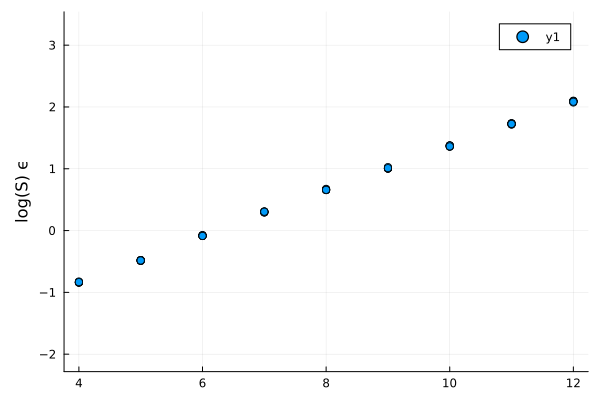

In [189]:
scatter(log.(xdata)./log(3),-log.(sydata)./log(3),aspect_ratio=1, yaxis = ("log(S) ϵ"))

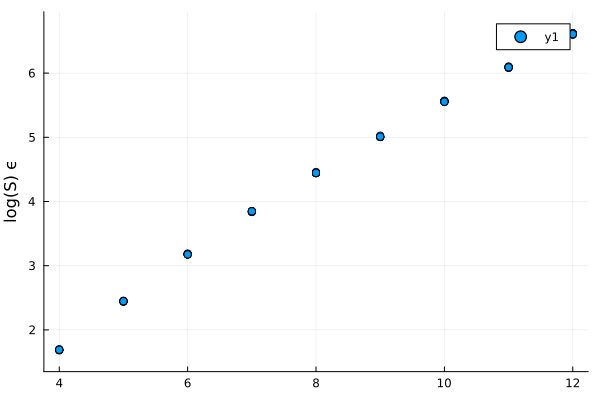

In [190]:
scatter(log.(xdata)./log(3),-log.(ydatas)./log(3),aspect_ratio=1, yaxis = ("log(S) ϵ"))

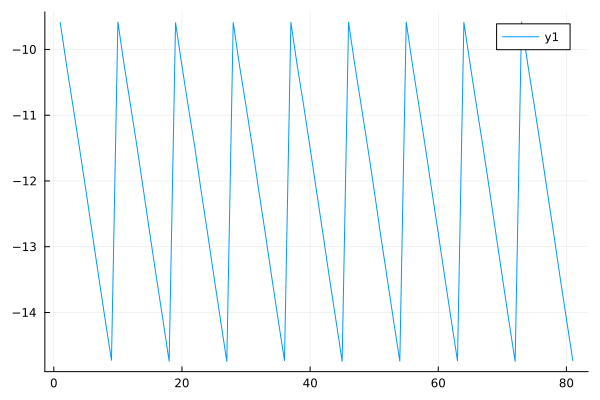

In [175]:
Plots.plot((-log.(ydata)./log(3))-(log.(xdata)./log(3))-(log.(100.0*log.(xdata)./log(3).+10.0)))

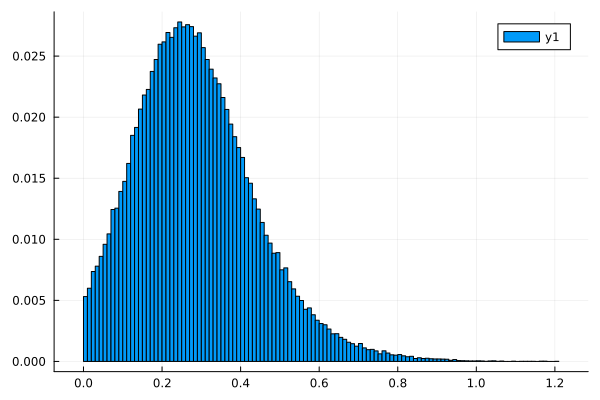

In [43]:
histogram(hist, normalize=:probability)

In [44]:
S = 300
T = 10^5
hist = [mutualinfo(stateestimate(p,n,S),dA,dB) for a = 1:T];

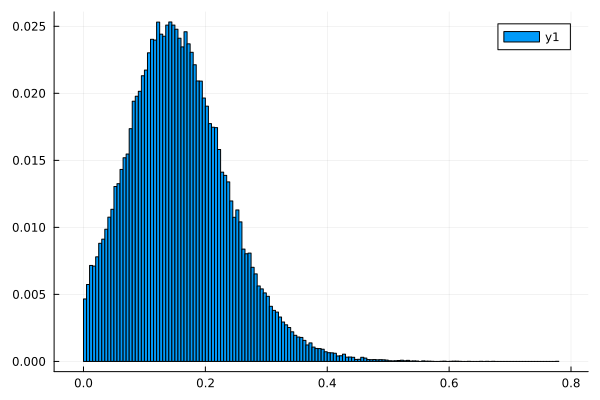

In [45]:
histogram(hist, normalize=:probability)

In [46]:
S = 1000
T = 10^5
hist = [mutualinfo(stateestimate(p,n,S),dA,dB) for a = 1:T];

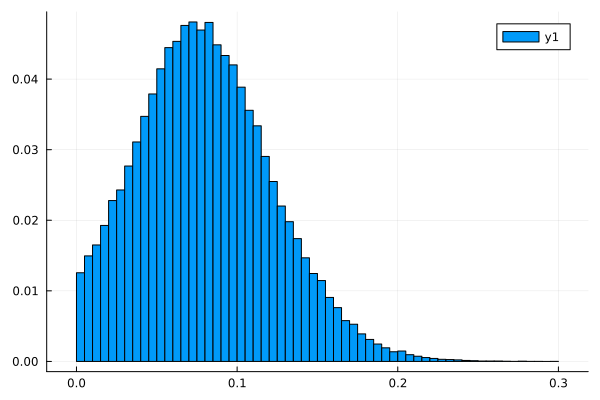

In [47]:
histogram(hist, normalize=:probability)

In [48]:
S = 3000
T = 10^5
hist = [mutualinfo(stateestimate(p,n,S),dA,dB) for a = 1:T];

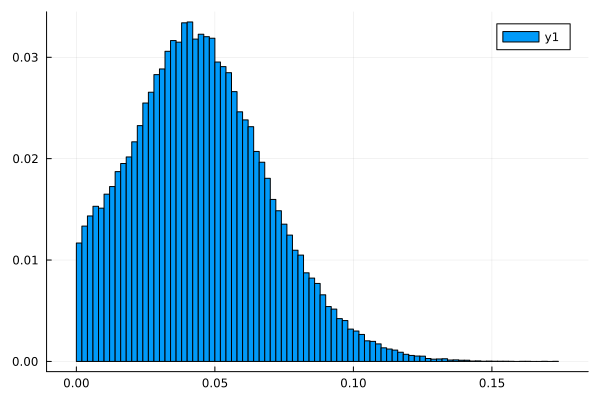

In [49]:
histogram(hist, normalize=:probability)

In [50]:
S = 10000
T = 10^5
hist = [mutualinfo(stateestimate(p,n,S),dA,dB) for a = 1:T];

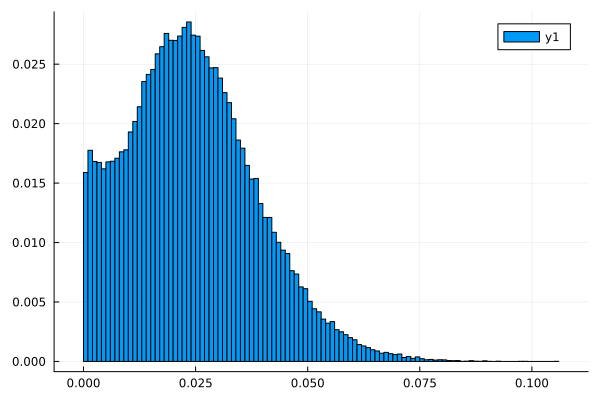

In [51]:
histogram(hist, normalize=:probability)

In [52]:
S = 30000
T = 10^5
hist = [mutualinfo(stateestimate(p,n,S),dA,dB) for a = 1:T];

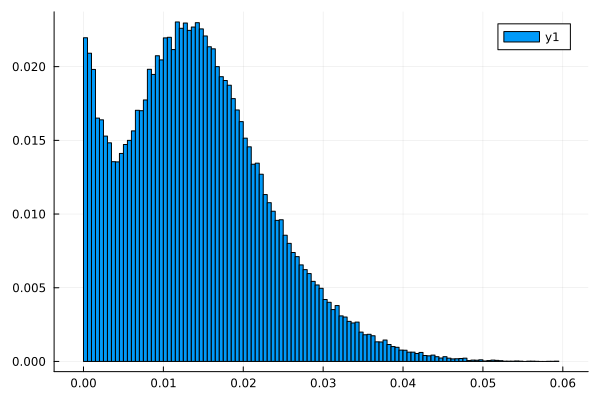

In [53]:
histogram(hist, normalize=:probability)

In [54]:
S = 100000
T = 10^5
hist = [mutualinfo(stateestimate(p,n,S),dA,dB) for a = 1:T];

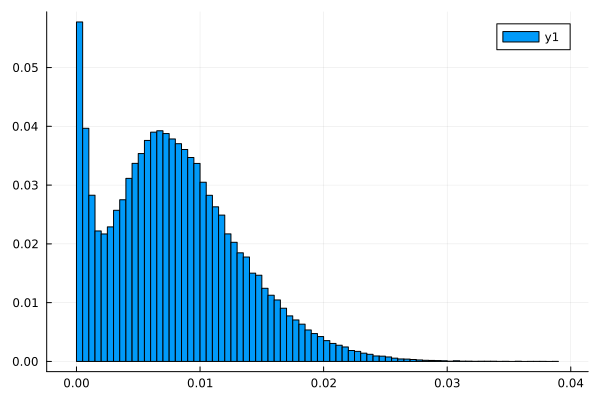

In [55]:
histogram(hist, normalize=:probability)

In [56]:
S = 300000
T = 10^5
hist = [mutualinfo(stateestimate(p,n,S),dA,dB) for a = 1:T];

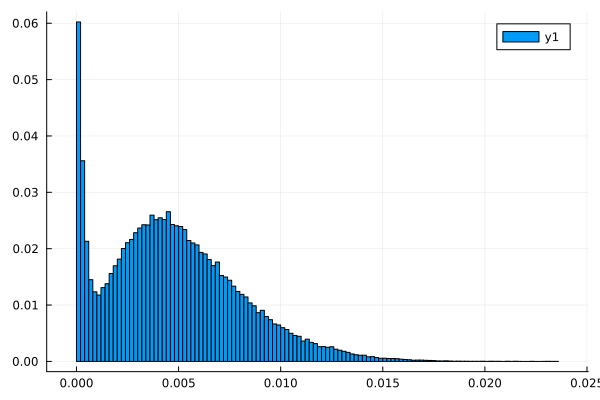

In [57]:
histogram(hist, normalize=:probability)

In [58]:
S = 1000000
T = 10^5
hist = [mutualinfo(stateestimate(p,n,S),dA,dB) for a = 1:T];

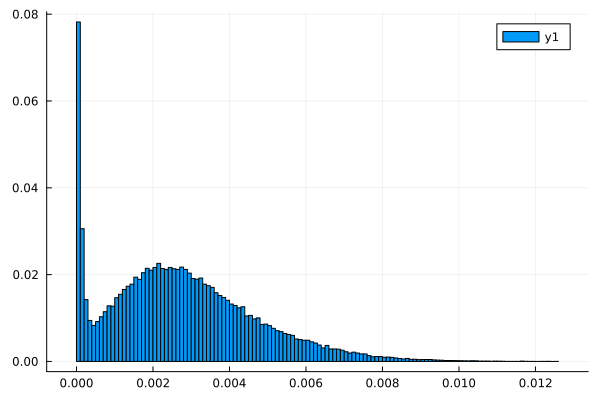

In [59]:
histogram(hist, normalize=:probability)

In [60]:
S = 3000000
T = 10^5
hist = [mutualinfo(stateestimate(p,n,S),dA,dB) for a = 1:T];

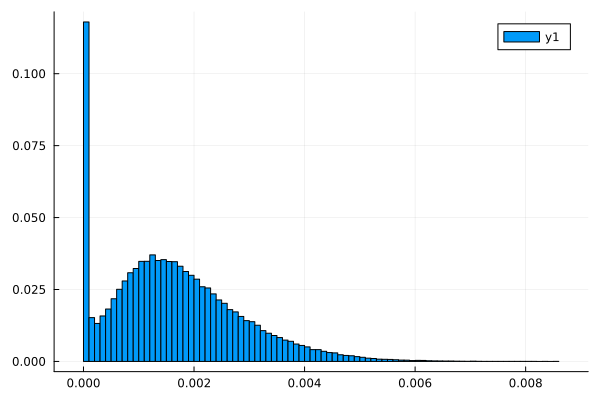

In [61]:
histogram(hist, normalize=:probability)

In [62]:
S = 10000000
T = 10^5
hist = [mutualinfo(stateestimate(p,n,S),dA,dB) for a = 1:T];

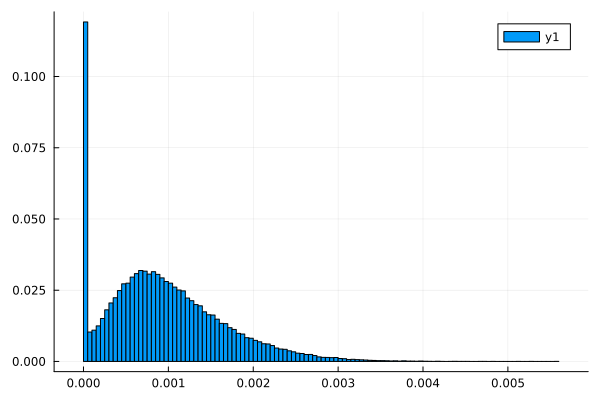

In [63]:
histogram(hist, normalize=:probability)

In [ ]:
# Haar random unitary
function haar(n::Int)
    A = (randn(n,n) .+ im .* randn(n,n)) ./sqrt(2.0)
    Q, R = qr(A)
    d = diag(R)
    return Q*diagm(d./abs.(d))
end

# Random density operator from the Bures measure
function randbures(n::Int)
    A = (randn(n,n) .+ im .* randn(n,n)) ./sqrt(2.0)
    U = haar(n);
    X = A .+ U*A;
    ρ = X*X'
    return ρ ./ tr(ρ)
end